In [2]:
import torch

x = torch.arange(12, dtype=torch.float32)
x.shape

X = x.reshape(3, -1)

print(X)

torch.zeros((2, 3, 4))

torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

print(X[-1], X[1:3], sep="\n")

X[1, 2] = 17

X[:2, :] = 12

torch.exp(x)

X = torch.arange(24, dtype=torch.float32).reshape((2, 3, 4))
Y = torch.arange(24, 48, dtype=torch.float32).reshape((2, 3, 4))
Z = torch.arange(48, 72, dtype=torch.float32).reshape((2, 4, 3))

print(X, Z)

tensor = torch.tensor([[[1, 2, 3]], [[4, 5, 6]]])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([ 8.,  9., 10., 11.])
tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]]) tensor([[[48., 49., 50.],
         [51., 52., 53.],
         [54., 55., 56.],
         [57., 58., 59.]],

        [[60., 61., 62.],
         [63., 64., 65.],
         [66., 67., 68.],
         [69., 70., 71.]]])


In [3]:
import os

os.makedirs(os.path.join("..", "data"), exist_ok=True)
data_file = os.path.join(".", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write(
        """NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000"""
    )

In [4]:
import pandas as pd

data = pd.read_csv("data/house_tiny.csv")

print(data)

inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000
   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1
   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


In [5]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [6]:
import pandas as pd

data = pd.read_csv("data/house_tiny.csv")

print(data)

inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000
   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1
   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


In [7]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
print(A)

sum_A = A.sum(dim=1, keepdim=True)
print(sum_A)

test_b = torch.tensor(
    [
        [
            3,
            3,
            3,
        ],
        [12, 12, 12],
    ],
    dtype=torch.float32,
)
print(test_b)

print(A / sum_A)
print(A / test_b)

A.cumsum(dim=0)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[ 3.],
        [12.]])
tensor([[ 3.,  3.,  3.],
        [12., 12., 12.]])
tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])
tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])


tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [8]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype=torch.float32)
print(x, y, torch.dot(x, y), sep="\n")

torch.sum(x * y)

tensor([0., 1., 2.])
tensor([1., 1., 1.])
tensor(3.)


tensor(3.)

In [9]:
A.shape, x.shape, torch.mv(A, x), A @ x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [10]:
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = torch.tensor([[10, 11, 12], [13, 14, 15], [16, 17, 18]])

print("Origin:")
print(A, B, end="\n\n", sep="\n")

print("Transposed:")
print(A.T, B.T, end="\n\n", sep="\n")

print("Transposed before sum:")
print(A.T + B.T, end="\n\n", sep="\n")

print("Transposed after sum:")
print((A + B).T, end="\n\n", sep="\n")

Origin:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

Transposed:
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
tensor([[10, 13, 16],
        [11, 14, 17],
        [12, 15, 18]])

Transposed before sum:
tensor([[11, 17, 23],
        [13, 19, 25],
        [15, 21, 27]])

Transposed after sum:
tensor([[11, 17, 23],
        [13, 19, 25],
        [15, 21, 27]])


In [11]:
(A + A.T) == (A + A.T).T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [12]:
X = torch.arange(24).reshape(2, 3, 4)
print(X)
X.sum(dim=0)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


tensor([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]])

In [13]:
print("Original tensor:")
print(A)
print()

print("Summed up along dim 1 (column):")
print(A.sum(dim=1))
print()

print("The result:")
print(A / A.sum(dim=1))

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Summed up along dim 1 (column):
tensor([ 6, 15, 24])

The result:
tensor([[0.1667, 0.1333, 0.1250],
        [0.6667, 0.3333, 0.2500],
        [1.1667, 0.5333, 0.3750]])


In [14]:
X = torch.arange(24).reshape(2, 3, 4)

print(X, end="\n\n")

print(X.sum(dim=0).shape)
print(X.sum(dim=1).shape)
print(X.sum(dim=2).shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])


In [15]:
import math

S = torch.arange(4).reshape(2, 2).float()  # create a simply two-dim tensor
print(torch.linalg.norm(S))  # calc norm of it
print(math.sqrt(0**2 + 1**2 + 2**2 + 3**2))  # calc norm using plain mathematics

J = torch.arange(48).reshape(2, 3, 4, 2).float()  # create a complex 4-dim tensor
print(torch.linalg.norm(J))  # calc norm of it
print(
    math.sqrt(sum(i**2 for i in range(48)))
)  # calc norm using plain mathematics which is not ideal

tensor(3.7417)
3.7416573867739413
tensor(188.9974)
188.9973544788392


In [16]:
import time

# Set the random seed for reproducibility
torch.manual_seed(0)

# Initialize the matrices
A = torch.randn(2**10, 2**16)
B = torch.randn(2**16, 2**5)
C = torch.randn(2**5, 2**14)

# measure the time used for running `(A @ B) @ C`
start_time = time.time()
# result_1 = (A @ B) @ C
end_time = time.time()
time_taken_1 = end_time - start_time
print(f"Time taken for (A @ B) @ C: {time_taken_1} seconds")

# measure the time used for running `A @ (B @ C)`
start_time = time.time()
# result_2 = A @ (B @ C)
end_time = time.time()
time_taken_2 = end_time - start_time
print(f"Time taken for A @ (B @ C): {time_taken_2} seconds")

Time taken for (A @ B) @ C: 1.4066696166992188e-05 seconds
Time taken for A @ (B @ C): 9.059906005859375e-06 seconds


In [17]:
import time

# The simplified case

a = torch.arange(24).reshape(4, 6)
b = torch.arange(24, 36).reshape(6, 2)
c = torch.arange(36, 48).reshape(2, 6)

print(a, b, c, sep="\n")
print(a @ b)

A = torch.randn((2**10, 2**16))
B = torch.randn((2**16, 2**5))
C = torch.randn((2**5, 2**16))

start_time = time.perf_counter()
result_a = A @ B
time_taken = time.perf_counter() - start_time
print(f"The code took {time_taken} seconds to run.")

start_time = time.perf_counter()
result_b = A @ C.T
time_taken = time.perf_counter() - start_time
print(f"The code took {time_taken} seconds to run.")

The code took 0.024152667028829455 seconds to run.
The code took 0.02381775004323572 seconds to run.


In [33]:
A = torch.randn(100, 200)
B = torch.randn(100, 200)
C = torch.randn(100, 200)

# stack A, B and C
T = torch.stack((A, B, C))

# slice out to recover B, as you can see they are equal.
B == T[1]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

$$\lim_{x \to 3} \frac{-4}{2x-5}$$

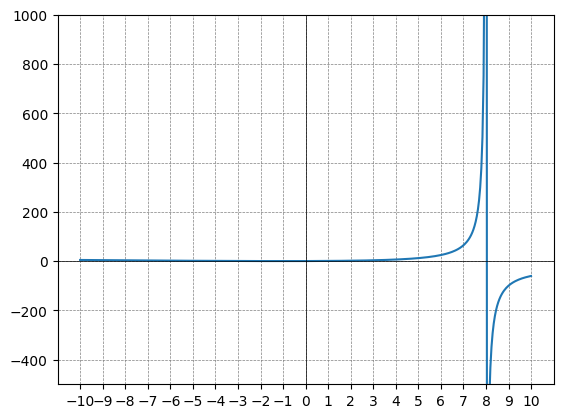

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Make sure to avoid x = 8 because it would make the denominator 0 and the function undefined
x = x[x != 8]

# Define the function
y = (x + 1)**2 / (8 - x)

# Create the plot
plt.plot(x, y)

# Add x and y axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Set x ticks
plt.ylim(-500, 1000)
plt.xticks(np.arange(-10, 11, step=1))

# Show the plot
plt.show()